In [ ]:
import numpy as np
import ZebraLib as zb
import pandas as pd
import time 
import random
from tqdm import tqdm

def gerador(x=1, min=1, max=5): 
    if x==1: 
        return float(random.uniform(min, max))
    else:
        lista = np.empty((x))
        for i in (range(x)): 
            lista[i]=(float(random.uniform(min, max)))
        return lista

class Aviao():

    def init(self, b=1.86, S=0.843, Af=0.601, CLn=1.080, CLmax=1.5193, c=0.463):
        self.b = b
        self.S = S
        self.Af = Af
        self.CLn = CLn
        self.CLmax = CLmax
        self.c = c

    def dados(self, it=5):
        n = it
        
        self.S = gerador(0.5, 1.5)
        self.b = gerador(1.5, 2.5)
        self.Af = gerador(0.2, 1)
        self.CLn = gerador(1.3, 1.87)
        self.c = gerador(0.2, 0.8)

        

        #z = np.zeros((it))
        z = []
        for x in range(it):
            z.append(zb.Airplane(S=self.S[x], b=self.b[x], Af=self.Af[x], CLn=self.CLn[x], c=self.c[x]))
        return z
    
start = time.time()
teste = Aviao()

a = teste.dados(1000)
print(time.time() - start)

In [18]:
import numpy as np
import ZebraLib as zb
import pandas as pd
import time 
import random
from tqdm import tqdm

def gerador(min=1, max=5, x=1): 
    if x==1: 
        return float(random.uniform(min, max))
    else:
        lista = np.empty((x))
        for i in (range(x)): 
            lista[i]=(float(random.uniform(min, max)))
        return lista

it = 1000
S = gerador(0.5, 1.5, it)
b = gerador(1.5, 2.5, it)
Af = gerador(0.2, 1, it)
CLn = gerador(1.3, 1.87, it)
c = gerador(0.2, 0.8, it)
h = gerador(0.05, 0.35, it)

z = []
for x in tqdm(range(it)):
    z.append(zb.Airplane(S=S[x], b=b[x], Af=Af[x], CLn=CLn[x], c=c[x], z=h[x]))

df = pd.DataFrame()

y = np.zeros((len(S)))
v_stall = np.zeros((len(S)))
v_to = np.zeros((len(S)))
for i in tqdm(range(len(y))):
     y[i] = z[i].takeOff_Distance_EDO()
     v_stall[i] = z[i].v_stall
     v_to[i] = z[i].Vlo

df['Área da asa'] = S
df['Envergadura'] = b
df['Afilamento'] = Af
df['CL natureza'] = CLn
df['corda média'] = c
df['distances'] = y
df['altura'] = h
df['Veloc. stall'] = v_stall
df['Veloc. TO'] = v_to

100%|██████████| 1000/1000 [00:29<00:00, 33.36it/s]


In [23]:
df.to_excel('D:/dados_aviões_geradores.xlsx')
df.sample(3)

,Área da asa,Envergadura,Afilamento,CL natureza,corda média,distances
972,1.019690,1.703788,0.830101,1.656658,0.771243,177.434202
161,0.568803,2.128563,0.362304,1.672789,0.435489,46.320947
541,0.890522,2.108603,0.691883,1.530162,0.517364,27.795421


In [27]:
filtro = df[df['Envergadura'] < 2]
filtro.sample(3)

,Área da asa,Envergadura,Afilamento,CL natureza,corda média,distances
170,1.042665,1.529002,0.361985,1.372038,0.779411,39.873123
526,0.789036,1.914862,0.946064,1.476262,0.431624,33.274514
485,1.285724,1.789761,0.931317,1.537709,0.674982,40.730053


In [31]:
df.iloc[df.idxmin()['distances']]

Área da asa     1.495539
Envergadura     2.431482
Afilamento      0.677179
CL natureza     1.348453
corda média     0.760865
distances      14.745345
Name: 929, dtype: float64

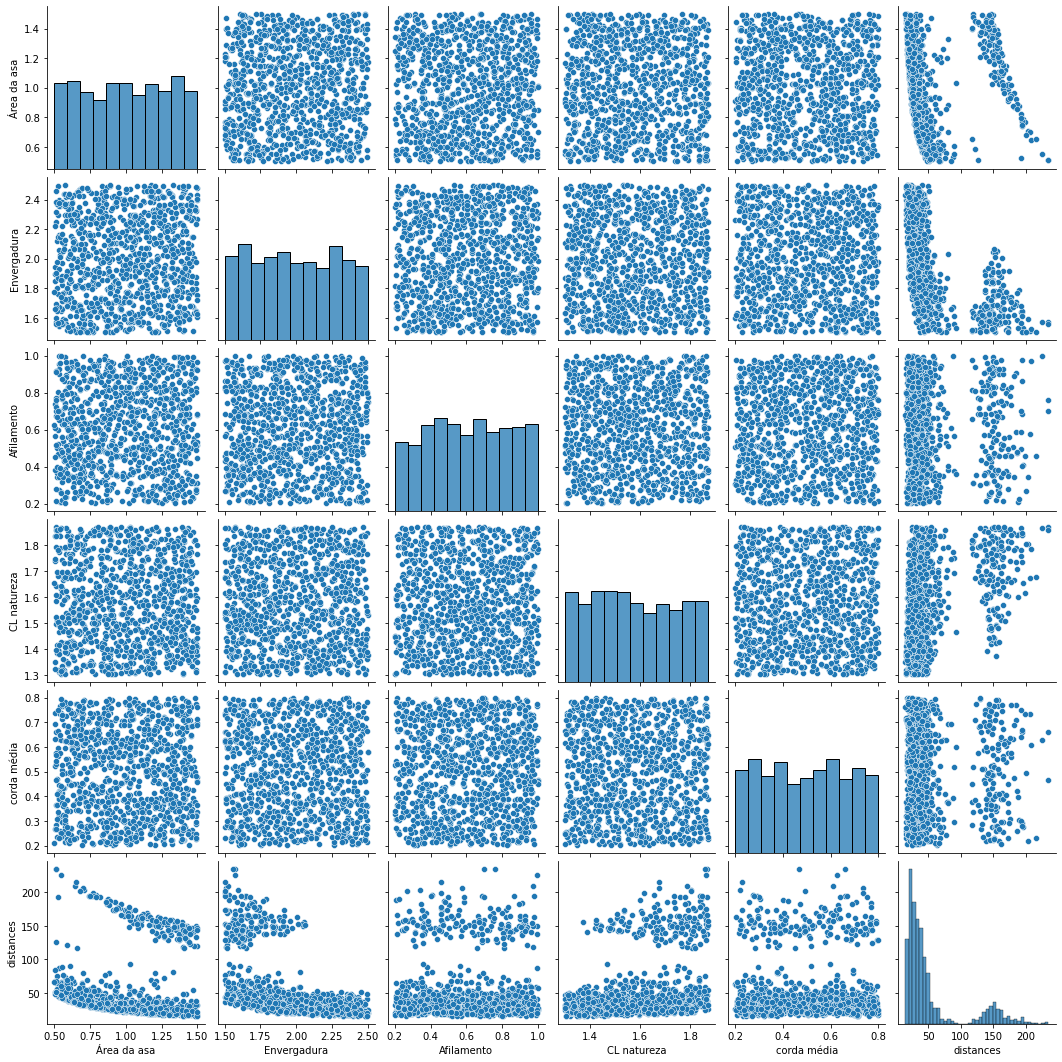

In [34]:
import seaborn as sns

df = pd.read_excel('D:/dados_aviões_geradores.xlsx')

sns.pairplot(data=df)

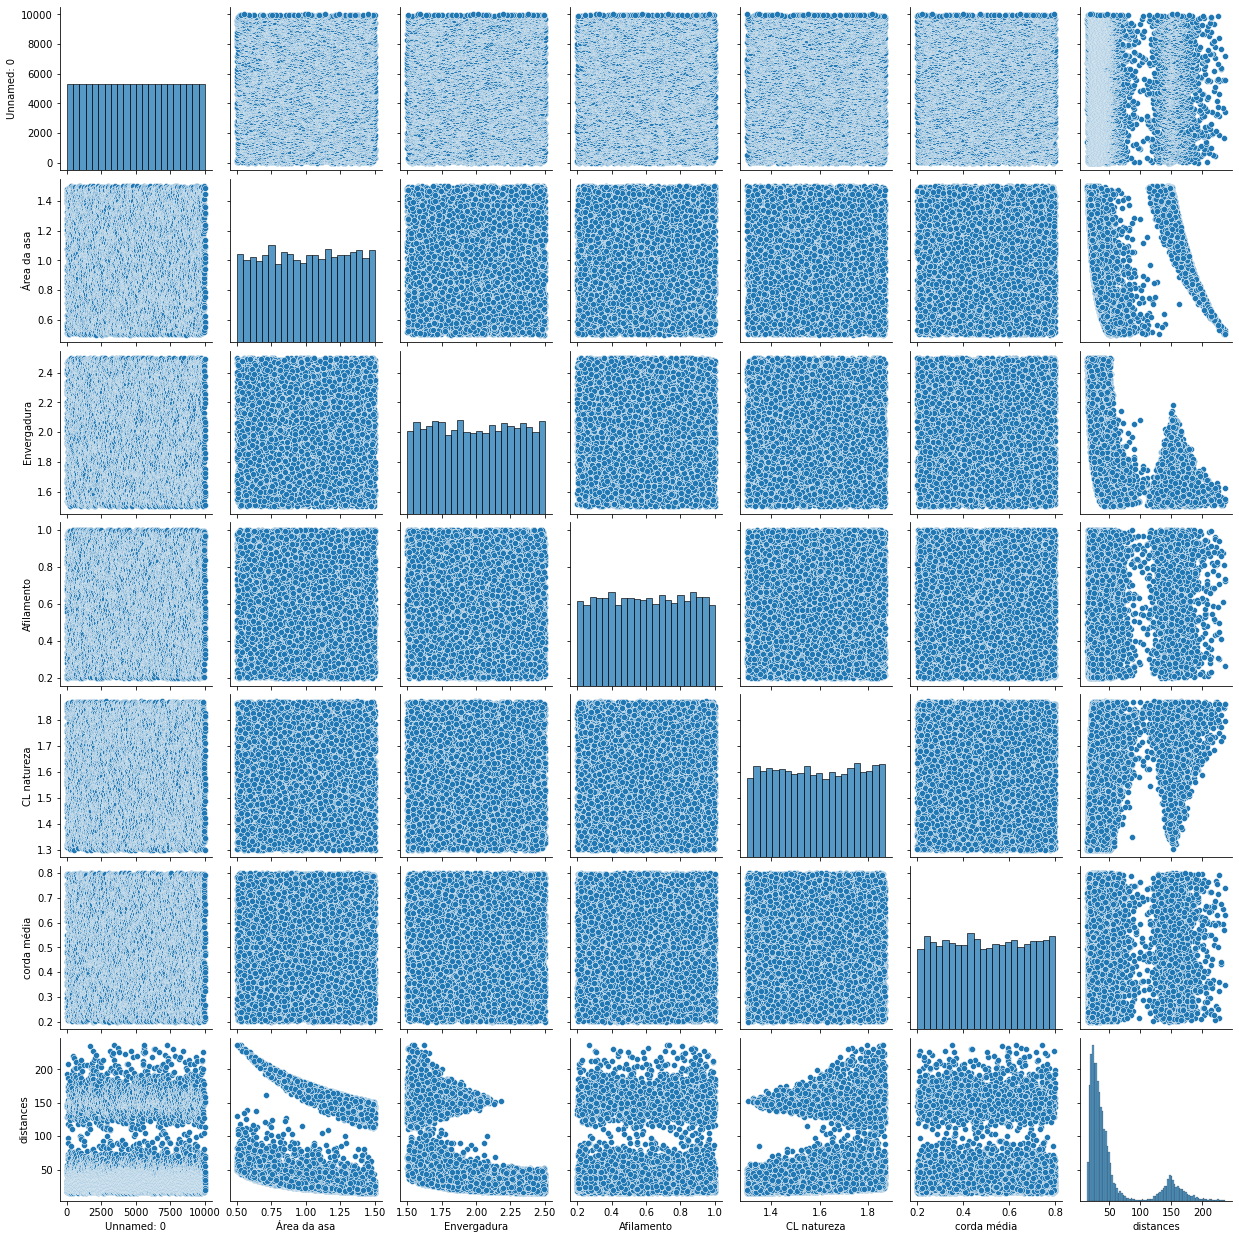

In [36]:
df = pd.read_excel('D:/dados_aviões_geradores.xlsx')
sns.pairplot(data=df)

In [37]:
df.iloc[df.idxmin()['distances']]

Unnamed: 0     3640.000000
Área da asa       1.488206
Envergadura       2.493139
Afilamento        0.564169
CL natureza       1.339815
corda média       0.491660
distances        14.337685
Name: 3640, dtype: float64